## Observations and Insights 

In [ ]:
# Pymaceuticals - Trend Analysis

# The following trends were identified following the analysis of data from Pymaceuticals.

# Pymaceuticals conducted testing of ten (10) different drugs on mice to determine effectiveness of tumour sizes.  Of the various drugs used Capomulin and Ramicane were tested on the greatest volume of mice, with Capomulin having the greatest reduction in tumour size. 

# The testing was conducted on both male and female mice of almost equal proportions, with the differential of 1% between the genders.  It would appear that gender is not a significant variable.

# The linear regression model with the correlation between the mouse weight versus the average tumour volume for Capomulin indicated a positive relationship. The correlation between weight and average tumour volume on the Capomulin regimen is 0.84.  This figure of 0.84 indicates a strong relationship between the mouse weight and average tumour volume. 

# Mouse ID x401 is just one of the mice treated with Capomulin where the tumour decreased in in size over time.  Mouse ID x401 is referred to within the data, however a review of mouse ID m601 and S185 both treated with Capomulin also provided similar indications of tumour reduction in size over time.  The effectiveness of Capomulin was not isolated,implying that this treatment was successful.


In [182]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [183]:
# Read the mouse data and the study results, find common column to merge
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [184]:
# Read the mouse data and the study results, find common column to merge
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [185]:
# Combine the data into a single dataset
mouse_combinedata = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_combinedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [186]:
# Checking the number of mice.
mouse_combinedata['Mouse ID'].nunique()

249

In [187]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_combinedata.loc[mouse_combinedata.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID']
duplicate_mouse

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [188]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mousedata = mouse_combinedata.loc[(mouse_combinedata['Mouse ID'].isin(duplicate_mouse))]
duplicate_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [189]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_micedata = mouse_combinedata.loc[~(mouse_combinedata['Mouse ID'].isin(duplicate_mouse))]
clean_micedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [190]:
# Checking the number of mice in the clean DataFrame.
clean_micedata['Mouse ID'].nunique()

248

## Summary Statistics

In [191]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Create summary table with Drug Regimes and counts
summarystats = pd.DataFrame(clean_micedata.groupby('Drug Regimen').count())

# Use groupby to create summary stats by drug regime, add results into columns in summarystats
summarystats["Mean"] = clean_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summarystats["Median"] = clean_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summarystats["Variance"] = clean_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summarystats["Standard Deviation"] = clean_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summarystats["SEM"] = clean_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']]

summarystats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

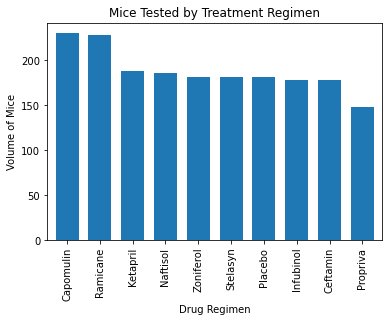

In [192]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_plot = clean_micedata['Drug Regimen'].value_counts().plot.bar(width=0.7)

# Set labels for axes
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Volume of Mice')
bar_plot.set_title('Mice Tested by Treatment Regimen')

bar_plot


Text(0, 0.5, 'Volume of Mice')

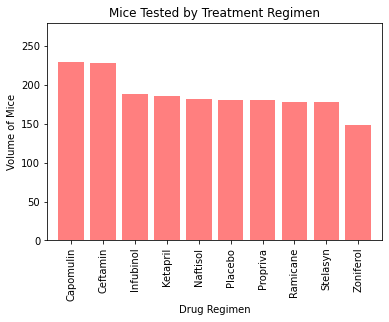

In [193]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment = clean_micedata['Drug Regimen'].value_counts()
x_axis = np.arange(len(treatment))

# Generate bar plot
plt.bar(x_axis, treatment, color='r', alpha=0.5, align="center")

# Place each of the x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')

# Sets the x limits
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits
plt.ylim(0, max(treatment)+50)

# Set labels for axes
plt.title('Mice Tested by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Volume of Mice')


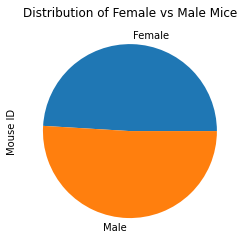

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_micedata.groupby('Sex').count()['Mouse ID']

#gender_df = pd.DataFrame(gender)

pie_plot = gender.plot.pie(y='Sex',title='Distribution of Female vs Male Mice')

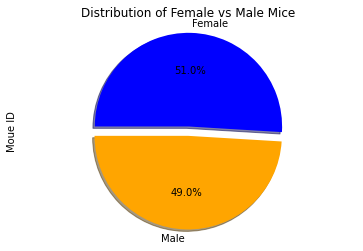

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_micedata.groupby('Sex').count()['Mouse ID']
sex = ['Male', 'Female']
colors = ['orange','blue']
explode = (0.1,0)

# Create a pie chart
plt.pie(gender, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

# Create axes and labels
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Moue ID')

plt.show()

## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = clean_micedata.loc[(clean_micedata['Drug Regimen'] == 'Capomulin') | (clean_micedata['Drug Regimen'] == 'Ramicane') | (clean_micedata['Drug Regimen'] == 'Infubinol') | (clean_micedata['Drug Regimen'] == 'Ceftamin'), :]

# Sort by Timpepoints based on the latest values to get final Tumor Volume
filtered_df = filtered_df.sort_values('Timepoint', ascending = False)

# Dropping duplicates, keeping first value, should be the final tumour volume
filtered_df = filtered_df.drop_duplicates(subset='Mouse ID', keep='first').reset_index().rename(columns={'Timepoint': 'Max Timepoint'})

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tv_merge_df= pd.merge(clean_micedata, filtered_df, how='inner', on='Mouse ID')

# # Display the data table for preview
tv_merge_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,index,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Max Timepoint,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,9,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,9,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,9,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,9,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,9,Ramicane,Male,21,16,45,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,1872,Infubinol,Female,24,25,45,62.754451,3
810,z581,Infubinol,Female,24,25,30,56.286750,2,1872,Infubinol,Female,24,25,45,62.754451,3
811,z581,Infubinol,Female,24,25,35,58.628399,3,1872,Infubinol,Female,24,25,45,62.754451,3
812,z581,Infubinol,Female,24,25,40,60.053740,3,1872,Infubinol,Female,24,25,45,62.754451,3


In [197]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    temp_df = tv_merge_df.loc[tv_merge_df['Drug Regimen_x'] == treatment]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)_x']
    tumor_vol.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)_x'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)_x'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')
    

    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0


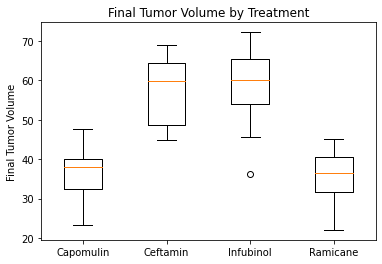

In [198]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol)
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
plt.show()

## Line and Scatter Plots

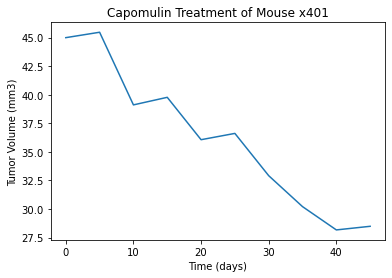

In [199]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = tv_merge_df.loc[tv_merge_df['Mouse ID'] == 'x401']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)_x'])

# Add labels and title to plot
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse x401')

# Display plot
plt.show()

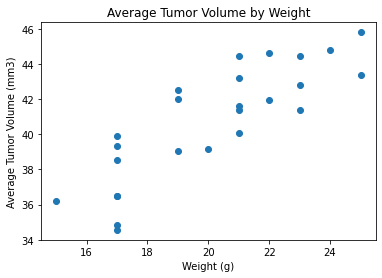

In [200]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = tv_merge_df.loc[tv_merge_df['Drug Regimen_x'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)_x'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)_x': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)_x', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)_x']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot 
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


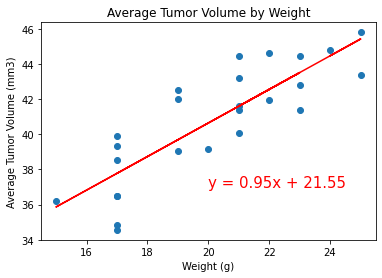

In [201]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = tv_merge_df.loc[tv_merge_df['Drug Regimen_x'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)_x'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)_x': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)_x', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)_x']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(st.pearsonr(x,y)[0],2)}.""")

# Calculate linear regression
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x,y)
regress_values = m_slope * x + m_int
line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()
